In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline

In [3]:
charlotte_rainfall = pd.read_csv('./charlotte_2_rg_2011.csv', header = None)

In [4]:
charlotte_rainfall.head()

,0,1,2,3,4,5,6
0,2011,1,1,0,0,0.0,0.0
1,2011,1,1,0,15,0.0,0.0
2,2011,1,1,0,30,0.0,0.0
3,2011,1,1,0,45,0.0,0.0
4,2011,1,1,1,0,0.0,0.0


In [5]:
charlotte_rainfall.columns = ["year","month","day", "hour", "min", "Rainfall_1", "Rainfall_2"]
charlotte_rainfall.loc[:,'dt'] = pd.to_datetime(dict(year=charlotte_rainfall['year'], month=charlotte_rainfall['month'], day=charlotte_rainfall['day'], hour=charlotte_rainfall['hour'], minute=charlotte_rainfall['min']))
charlotte_rainfall.index=charlotte_rainfall['dt']

In [6]:
charlotte_rainfall.head()

,year,month,day,hour,min,Rainfall_1,Rainfall_2,dt
dt,,,,,,,,
2011-01-01 00:00:00,2011,1,1,0,0,0.0,0.0,2011-01-01 00:00:00
2011-01-01 00:15:00,2011,1,1,0,15,0.0,0.0,2011-01-01 00:15:00
2011-01-01 00:30:00,2011,1,1,0,30,0.0,0.0,2011-01-01 00:30:00
2011-01-01 00:45:00,2011,1,1,0,45,0.0,0.0,2011-01-01 00:45:00
2011-01-01 01:00:00,2011,1,1,1,0,0.0,0.0,2011-01-01 01:00:00


In [7]:
charlotte_rainfall.drop('year', 1, inplace=True)
charlotte_rainfall.drop('month', 1, inplace=True)
charlotte_rainfall.drop('day', 1, inplace=True)
charlotte_rainfall.drop('hour', 1, inplace=True)
charlotte_rainfall.drop('min', 1, inplace=True)
charlotte_rainfall.drop('dt', 1, inplace=True)

In [8]:
charlotte_rainfall.head()

,Rainfall_1,Rainfall_2
dt,,
2011-01-01 00:00:00,0.0,0.0
2011-01-01 00:15:00,0.0,0.0
2011-01-01 00:30:00,0.0,0.0
2011-01-01 00:45:00,0.0,0.0
2011-01-01 01:00:00,0.0,0.0


In [9]:
charlotte_rainfall.index.name = 'dt'

In [10]:
charlotte_rainfall.head()

,Rainfall_1,Rainfall_2
dt,,
2011-01-01 00:00:00,0.0,0.0
2011-01-01 00:15:00,0.0,0.0
2011-01-01 00:30:00,0.0,0.0
2011-01-01 00:45:00,0.0,0.0
2011-01-01 01:00:00,0.0,0.0


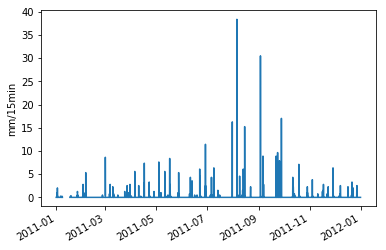

In [11]:
charlotte_rainfall["Rainfall_1"] = charlotte_rainfall["Rainfall_1"].replace(-99, np.nan)
fig = plt.figure()
plt.plot(charlotte_rainfall.index, charlotte_rainfall["Rainfall_1"])
plt.ylabel('mm/15min')
fig.autofmt_xdate()

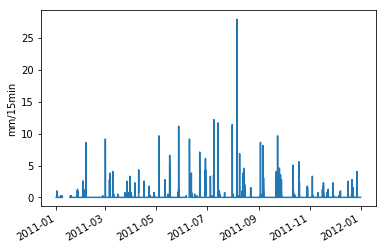

In [12]:
charlotte_rainfall["Rainfall_2"] = charlotte_rainfall["Rainfall_2"].replace(-99, np.nan)
fig = plt.figure()
plt.plot(charlotte_rainfall.index, charlotte_rainfall["Rainfall_2"])
plt.ylabel('mm/15min')
fig.autofmt_xdate()

In [138]:
#mask = (charlotte_rainfall.Rainfall_1 == 0) | (charlotte_rainfall.Rainfall_2 == 0)
#charlotte_rainfall = charlotte_rainfall.loc[~mask]
#mask = (np.isnan(charlotte_rainfall.Rainfall_1)) | (np.isnan(charlotte_rainfall.Rainfall_2))
#charlotte_rainfall = charlotte_rainfall.loc[~mask]

Resample to 24h accumulation

In [13]:
charlotte_24h_rainfall = pd.DataFrame()
charlotte_24h_rainfall['mean_rain_1'] = charlotte_rainfall.Rainfall_1.resample('D').mean()
charlotte_24h_rainfall['accum_rain_1'] = charlotte_rainfall.Rainfall_1.resample('D').sum()
charlotte_24h_rainfall['mean_rain_2'] = charlotte_rainfall.Rainfall_2.resample('D').mean()
charlotte_24h_rainfall['accum_rain_2'] = charlotte_rainfall.Rainfall_2.resample('D').sum()

In [14]:
mask = (charlotte_24h_rainfall.accum_rain_1 == 0) | (charlotte_24h_rainfall.accum_rain_2 == 0)
charlotte_24h_rainfall = charlotte_24h_rainfall.loc[~mask]
mask = (np.isnan(charlotte_24h_rainfall.accum_rain_1)) | (np.isnan(charlotte_24h_rainfall.accum_rain_2))
charlotte_24h_rainfall = charlotte_24h_rainfall.loc[~mask]

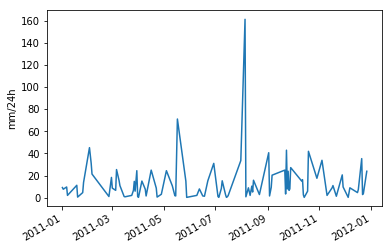

In [15]:
fig = plt.figure()
plt.plot(charlotte_24h_rainfall.index, charlotte_24h_rainfall['accum_rain_1'])
plt.ylabel('mm/24h')
fig.autofmt_xdate()

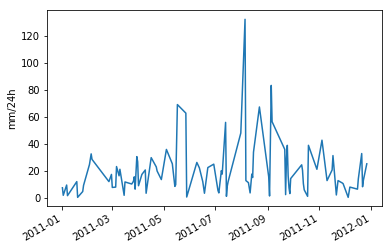

In [16]:
fig = plt.figure()
plt.plot(charlotte_24h_rainfall.index, charlotte_24h_rainfall['accum_rain_2'])
plt.ylabel('mm/24h')
fig.autofmt_xdate()

Try plotting Semivariogram

In [156]:
#charlotte_24h_rainfall['minutes'] = np.arange(0, 24*60*len(charlotte_24h_rainfall.accum_rain_1), 24*60)

In [80]:
charlotte_24h_rainfall['seconds'] = charlotte_24h_rainfall.index.astype(np.int64) // 10 ** 9 - ( charlotte_24h_rainfall.index.astype(np.int64)[0] // 10 ** 9)

Set seconds from zero to length

In [18]:
charlotte_24h_rainfall['seconds'] = np.arange(0,len(charlotte_24h_rainfall.accum_rain_1), 1)
charlotte_24h_rainfall['zeros'] = np.zeros((len(charlotte_24h_rainfall.accum_rain_1), 1), dtype=np.int8)

In [19]:
charlotte_24h_rainfall.head()

,mean_rain_1,accum_rain_1,mean_rain_2,accum_rain_2,seconds,zeros
dt,,,,,,
2011-01-01,0.095250,9.144,0.076729,7.366,0,0
2011-01-02,0.143774,7.620,0.034863,1.778,86400,0
2011-01-06,0.100542,9.652,0.097896,9.398,432000,0
2011-01-07,0.021167,2.032,0.015875,1.524,518400,0
2011-01-18,0.116417,11.176,0.124354,11.938,1468800,0


New try

In [20]:
from rpy2.robjects.packages import importr
from rpy2.robjects import r

In [21]:
sp = importr('sp')
gstat = importr('gstat')
intamap = importr('intamap')

In [22]:
r('jet.colors  <- c("#00007F","blue","#007FFF","cyan","#7FFF7F","yellow","#FF7F00","red","#7F0000")')
r('col.palette <- colorRampPalette(jet.colors)')

R object with classes: ('function',) mapped to:
<SignatureTranslatedFunction - Python:0x7f2d0c3e8488 / R:0x55e2b839cd30>

In [88]:
rain1 = charlotte_24h_rainfall[['accum_rain_1', 'seconds', 'zeros']]
rain2 = charlotte_24h_rainfall[['accum_rain_2', 'seconds', 'zeros']]

In [24]:
from rpy2.robjects import pandas2ri
pandas2ri.activate()

In [190]:
r_df = pandas2ri.py2ri(rain1)
r.assign('mydata', r_df)
r_df2 = pandas2ri.py2ri(rain2)
r.assign('mydata2', r_df2)

accum_rain_2,seconds,zeros
7.366000,0,0
1.778000,1,0
9.398000,2,0


In [191]:
r('''
mydata <- data.frame(mydata)
coordinates(mydata) <- ~seconds+zeros

mydata2 <- data.frame(mydata2)
coordinates(mydata2) <- ~seconds+zeros
''')

R object with classes: ('formula',) mapped to:
<RObject - Python:0x7f2cec7e34c8 / R:0x55e2bc3ea278>

In [198]:
p_myiso = r('myiso <- variogram(accum_rain_1~1,mydata,width=5,cutoff=100)')
p_myiso2 = r('myiso2 <- variogram(accum_rain_2~1,mydata2,width=5,cutoff=100)')

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

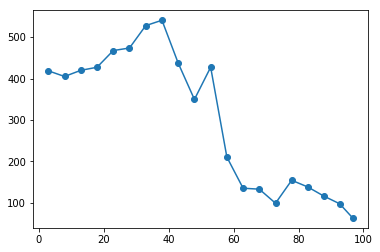

In [199]:
plt.plot(p_myiso['dist'], p_myiso['gamma'], '-o')

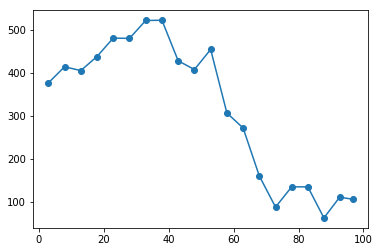

In [200]:
plt.plot(p_myiso2['dist'], p_myiso2['gamma'], '-o')

In [58]:
p_myiso

,np,dist,gamma,dir.hor,dir.ver,id
1,43.0,86400.0,422.430513,0.0,0.0,var1
2,24.0,172800.0,189.549352,0.0,0.0,var1
3,21.0,259200.0,235.647762,0.0,0.0,var1
4,29.0,345600.0,494.577431,0.0,0.0,var1
5,28.0,432000.0,408.816003,0.0,0.0,var1
6,34.0,518400.0,559.445750,0.0,0.0,var1
7,22.0,604800.0,110.771039,0.0,0.0,var1
8,16.0,691200.0,797.218164,0.0,0.0,var1
9,19.0,777600.0,724.105513,0.0,0.0,var1
10,19.0,864000.0,733.280367,0.0,0.0,var1


In [59]:
p_myiso2

,np,dist,gamma,dir.hor,dir.ver,id
1,43.0,86400.0,337.848537,0.0,0.0,var1
2,24.0,172800.0,376.820483,0.0,0.0,var1
3,21.0,259200.0,405.347884,0.0,0.0,var1
4,29.0,345600.0,408.376269,0.0,0.0,var1
5,28.0,432000.0,255.964926,0.0,0.0,var1
6,34.0,518400.0,415.970705,0.0,0.0,var1
7,22.0,604800.0,101.788653,0.0,0.0,var1
8,16.0,691200.0,617.980619,0.0,0.0,var1
9,19.0,777600.0,595.236501,0.0,0.0,var1
10,19.0,864000.0,344.425457,0.0,0.0,var1


In [94]:
r('''
variogram_map <- variogram(accum_rain_1~1,mydata,width=1,cutoff=50,map=TRUE)
png("variogram_map_temporal.png",height=600,width=600)
print(plot(variogram_map))
dev.off()
''')

array([1], dtype=int32)

In [134]:
r('''
initial_vario_sph <- vgm(psill=100,model="Lin",range=8,nugget=350)
fitted_vario_sph <- fit.variogram(myiso,initial_vario_sph)
range  <- fitted_vario_sph$range[2]				# fitted range
nugget <- fitted_vario_sph$psill[1]				# fitted nugget
sill   <- sum(fitted_vario_sph$psill)			# fitted sill (total sill)
SSErr_sph <- attributes(fitted_vario_sph)$SSErr	# sum of squared errors (goodness of fit)

png("fitted_isotropic_variogram_sph_temporal.png",height=600,width=900)
print(plot(myiso,fitted_vario_sph))
dev.off()
''')

array([2], dtype=int32)

In [135]:
r('range')

array([ 65.63506915])

In [136]:
r('nugget')

array([ 398.73065619])

In [137]:
r('sill')

array([ 570.37850329])

In [138]:
r('SSErr_sph')

array([ 14691.8056161])

Rainfall values on 5th august 2011

In [147]:
event_rain = charlotte_rainfall.loc['2011-08-05 00:00:00':'2011-08-05 23:59:59']
event_rain_1 = event_rain.Rainfall_1
event_rain_2 = event_rain.Rainfall_2

In [144]:
import datetime as dt

In [148]:
event_rain_2.index = event_rain_2.index + dt.timedelta(hours=72)

In [173]:
event_rain_1 = pd.Series(event_rain_1.Rainfall_1)

In [175]:
my_event = event_rain_1.append(event_rain_2)

In [177]:
my_event = pd.DataFrame(my_event)
my_event.columns = ['R']

my_event['seconds'] = my_event.index.astype(np.int64) // 10 ** 9 - ( my_event.index.astype(np.int64)[0] // 10 ** 9)
my_event['zeros'] = np.zeros((len(my_event.R), 1), dtype=np.int8)

In [241]:
my_event.tail()

,R,seconds,zeros
dt,,,
2011-08-08 22:45:00,0.254,341100,0
2011-08-08 23:00:00,0.254,342000,0
2011-08-08 23:15:00,0.254,342900,0
2011-08-08 23:30:00,0.254,343800,0
2011-08-08 23:45:00,0.254,344700,0


In [208]:
r_df = pandas2ri.py2ri(my_event)
r.assign('mydata_event', r_df)

R,seconds,zeros
0.000000,0,0
0.000000,900,0
0.000000,"1,800",0


In [209]:
r('''
mydata_event <- data.frame(mydata_event)
coordinates(mydata_event) <- ~seconds+zeros
''')

R object with classes: ('formula',) mapped to:
<RObject - Python:0x7f2ceaebc548 / R:0x55e2bab5b230>

In [235]:
p_myiso = r('myiso_event <- variogram(R~1,mydata_event,width=1800,cutoff=250000)')

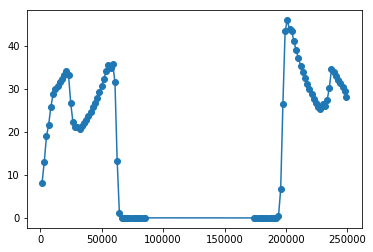

In [236]:
plt.plot(p_myiso['dist'], p_myiso['gamma'], '-o')

In [237]:
from pandas.plotting import autocorrelation_plot

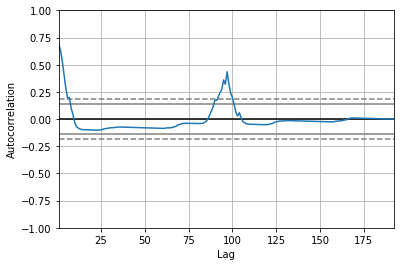

In [238]:
autocorrelation_plot(my_event.R)

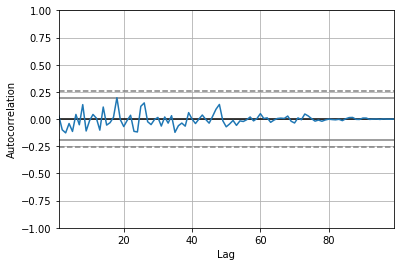

In [239]:
autocorrelation_plot(rain1.accum_rain_1)

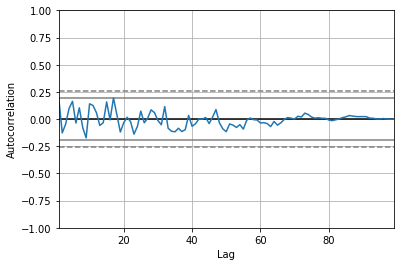

In [240]:
autocorrelation_plot(rain2.accum_rain_2)

In [26]:
from scipy.spatial.distance import pdist, squareform

In [20]:
data = np.array(charlotte_24h_rainfall[['seconds', 'zeros', 'accum_rain_1']])
lags = np.arange(86400, 864000, 86400)
sill = np.var(data[:,2])

In [22]:
print(sill)
print(lags)

381.871329624
[ 86400 172800 259200 345600 432000 518400 604800 691200 777600]


In [32]:
distances = squareform(pdist(data[:,:2]))

In [37]:
print(distances)

[[        0.     86400.    432000. ...,  30672000.  30758400.  31104000.]
 [    86400.         0.    345600. ...,  30585600.  30672000.  31017600.]
 [   432000.    345600.         0. ...,  30240000.  30326400.  30672000.]
 ..., 
 [ 30672000.  30585600.  30240000. ...,         0.     86400.    432000.]
 [ 30758400.  30672000.  30326400. ...,     86400.         0.    345600.]
 [ 31104000.  31017600.  30672000. ...,    432000.    345600.         0.]]


In [44]:
tail = data[0:-1,2]
head = data[1::,2]
cur_diff = (tail-head)**2
cur_sum = sum(cur_diff)
cur_var = 1/(2*len(tail))*cur_sum
print(cur_var)

374.074959551


In [58]:
tail = data[0:-2,2]
head = data[2::,2]
print(len(head))
cur_diff = (tail-head)**2
cur_sum = sum(cur_diff)
cur_var = 1/(2*len(tail))*cur_sum

print(cur_var)

97
427.027080763


In [46]:
tail = data[0:-3,2]
head = data[3::,2]
cur_diff = (tail-head)**2
cur_sum = sum(cur_diff)
cur_var = 1/(2*len(tail))*cur_sum
print(cur_var)

441.820352917


In [47]:
tail = data[0:-4,2]
head = data[4::,2]
cur_diff = (tail-head)**2
cur_sum = sum(cur_diff)
cur_var = 1/(2*len(tail))*cur_sum
print(cur_var)

408.916329874


In [59]:
tail = data[0:-5,2]
head = data[5::,2]
cur_diff = (tail-head)**2
cur_sum = sum(cur_diff)
cur_var = 1/(2*len(tail))*cur_sum
print(cur_var)

442.493281106


In [60]:
tail = data[0:-6,2]
head = data[6::,2]
cur_diff = (tail-head)**2
cur_sum = sum(cur_diff)
cur_var = 1/(2*len(tail))*cur_sum
print(cur_var)

382.355808301


In [61]:
tail = data[0:-7,2]
head = data[7::,2]
cur_diff = (tail-head)**2
cur_sum = sum(cur_diff)
cur_var = 1/(2*len(tail))*cur_sum
print(cur_var)

425.041576283


In [251]:
data = np.array(charlotte_24h_rainfall[['seconds', 'zeros', 'accum_rain_1']])
npoints, cols = data.shape

In [252]:
npoints

99

In [253]:
cols

3

In [254]:
from scipy.spatial.distance import pdist, squareform

In [255]:
square_data = squareform(pdist(data[:,:2]))

In [256]:
lags = np.arange(1*7*24*60*60, 6*30*24*60*60, 1*7*24*60*60 )
sill = np.var(data[:,2])

In [257]:
sill

381.87132962350768

In [258]:
lags.shape

(25,)

In [259]:
def lagindices( pwdist, lag, tol ):
    '''
    Input:  (pwdist) square NumPy array of pairwise distances
            (lag)    the distance, h, between points
            (tol)    the tolerance we are comfortable with around (lag)
    Output: (ind)    list of tuples; the first element is the row of
                     (data) for one point, the second element is the row
                     of a point (lag)+/-(tol) away from the first point,
                     e.g., (3,5) corresponds fo data[3,:], and data[5,:]
    '''
    # grab the coordinates in a given range: lag +/- tolerance
    i, j = np.where( ( pwdist >= lag - tol )&( pwdist < lag + tol ) )
    # zip the coordinates into a list
    indices = zip( i, j )
    # take out the repeated elements,
    # since p is a *symmetric* distance matrix
    indices = np.array([ i for i in indices if i[1] > i[0] ])
    return indices
def semivariance( data, indices ):
    '''
    Input:  (data)    NumPy array where the fris t two columns
                      are the spatial coordinates, x and y, and
                      the third column is the variable of interest
            (indices) indices of paired data points in (data)
    Output:  (z)      semivariance value at lag (h) +/- (tol)
    '''
    # take the squared difference between
    # the values of the variable of interest
    z = [ ( data[i,2] - data[j,2] )**2.0 for i,j in indices ]
    # the semivariance is half the mean squared difference
    return np.mean( z ) / 2.0

In [260]:
index = [ lagindices( square_data, lag, 0.1 ) for lag in lags ]

In [261]:
lags

array([  604800,  1209600,  1814400,  2419200,  3024000,  3628800,
        4233600,  4838400,  5443200,  6048000,  6652800,  7257600,
        7862400,  8467200,  9072000,  9676800, 10281600, 10886400,
       11491200, 12096000, 12700800, 13305600, 13910400, 14515200, 15120000])

In [262]:
v = np.array([ semivariance( data, indices ) for indices in index ])

In [263]:
v

array([  110.77103945,   170.52990087,   583.38473526,  1014.0609519 ,
          81.806288  ,   219.54514296,   419.8004091 ,   105.60389436,
         154.57630375,  1194.30699555,   205.42201619,   147.757769  ,
         458.83046064,   130.55838991,   604.10257861,   276.88724426,
         302.6219754 ,   972.56948343,   868.30113078,   927.36158613,
         148.47147725,   223.2882631 ,   702.46230475,    64.95294927,
         157.0351698 ])

In [269]:
v.size

25

In [264]:
vario = np.array( zip( lags, v ) ).T

In [267]:
h, sv = np.array( zip( lags, v ) ).T

TypeError: iteration over a 0-d array

In [265]:
h, sv = lags, v

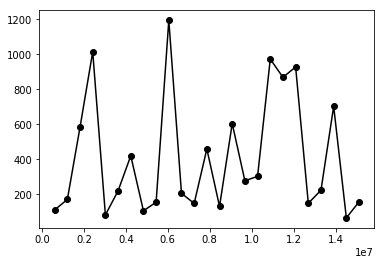

In [271]:
plt.plot( h, sv, 'ko-' )

In [224]:
def SVh( P, h, bw ):
    '''
    Experimental semivariogram for a single lag
    '''
    pd = squareform( pdist( P[:,:2] ) )
    N = pd.shape[0]
    Z = list()
    for i in range(N):
        for j in range(i+1,N):
            if( pd[i,j] >= h-bw )and( pd[i,j] <= h+bw ):
                Z.append( ( P[i,2] - P[j,2] )**2.0 )
    return np.sum( Z ) / ( 2.0 * len( Z ) )
 
def SV( P, hs, bw ):
    '''
    Experimental variogram for a collection of lags
    '''
    sv = list()
    for h in hs:
        sv.append( SVh( P, h, bw ) )
    sv = [ [ hs[i], sv[i] ] for i in range( len( hs ) ) if sv[i] > 0 ]
    return np.array( sv ).T
 
def C( P, h, bw ):
    '''
    Calculate the sill
    '''
    c0 = np.var( P[:,2] )
    if h == 0:
        return c0
    return c0 - SVh( P, h, bw )

In [241]:
86400/2.0

43200.0

In [238]:
lags

array([  604800,  1209600,  1814400,  2419200,  3024000,  3628800,
        4233600,  4838400,  5443200,  6048000,  6652800,  7257600,
        7862400,  8467200,  9072000,  9676800, 10281600, 10886400,
       11491200, 12096000, 12700800, 13305600, 13910400, 14515200, 15120000])

In [250]:
lags = np.arange(86400, 86400*15, 86400/2.0)
print(lags)

[   86400.   129600.   172800.   216000.   259200.   302400.   345600.
   388800.   432000.   475200.   518400.   561600.   604800.   648000.
   691200.   734400.   777600.   820800.   864000.   907200.   950400.
   993600.  1036800.  1080000.  1123200.  1166400.  1209600.  1252800.]


/home/kriete/.virtualenvs/cie5703/lib/python3.5/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


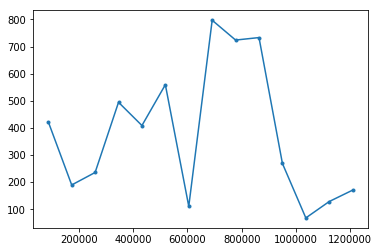

In [249]:
sv = SV( data, lags, 10000 )
plt.plot( sv[0], sv[1], '.-' )